In [13]:
import numpy as np
import gensim
import logging
import string
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

from keras.callbacks import LambdaCallback
from keras.layers.recurrent import LSTM

from keras.layers.embeddings import Embedding
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils.data_utils import get_file

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [2]:
# tsne implimentation from:
# https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [7]:
url = 'https://github.com/jobaird/cs344/blob/master/AI%20Project/Hitchhikers_quotes.txt'
path = get_file('hitch.txt', origin=url)

#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [4]:
def print_input(input_file):
    f = open(input_file, "r")
    for i, line in enumerate(f):
        print(line)


def read_input(input_file):
    f = open(input_file, "r")
    for i, line in enumerate(f):

        yield gensim.utils.simple_preprocess(line)


def word2idx(word):
  return word_model.wv.vocab[word].index

def idx2word(idx):
  return word_model.wv.index2word[idx]

In [5]:
def sample(preds, temperature=1.0):
  if temperature <= 0:
    return np.argmax(preds)
  preds = np.asarray(preds).astype('float64')
  preds = np.log(preds) / temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1, preds, 1)
  return np.argmax(probas)


def generate_next(text, num_generated=15):
  word_idxs = [word2idx(word) for word in text.lower().split()]
  for i in range(num_generated):
    prediction = model.predict(x=np.array(word_idxs))
    idx = sample(prediction[-1], temperature=0.7)
    word_idxs.append(idx)
  return ' '.join(idx2word(idx) for idx in word_idxs)

def on_epoch_end(epoch, _):
  print('\nGenerating text after epoch: %d' % epoch)
  texts = [
      'the universe',
      'the guide',
      'arthur dent',
      'zaphod',
      'the answer',
  ]
  for text in texts:
    sample = generate_next(text)
    print('%s... -> %s' % (text, sample))

In [8]:
max_sentence_len = 40
with open(path) as file_:
  docs = file_.readlines()
sentences = [[word for word in doc.lower().translate(string.punctuation).split()[:max_sentence_len]] for doc in docs]
print('\nTraining word2vec...')
word_model = gensim.models.Word2Vec(sentences, size=40, min_count=1, window=5, iter=200)
pretrained_weights = word_model.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape
print('Result embedding shape:', pretrained_weights.shape)
print('Checking similar words:')
for word in ['universe', 'guide', 'arthur', 'zaphod', 'answer']:
  most_similar = ', '.join('%s (%.2f)' % (similar, dist) for similar, dist in word_model.most_similar(word)[:8])
  print('  %s -> %s' % (word, most_similar))

2019-05-13 12:57:39,483 : INFO : collecting all words and their counts
2019-05-13 12:57:39,484 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-13 12:57:39,487 : INFO : collected 2856 word types from a corpus of 8678 raw words and 371 sentences
2019-05-13 12:57:39,490 : INFO : Loading a fresh vocabulary
2019-05-13 12:57:39,497 : INFO : effective_min_count=1 retains 2856 unique words (100% of original 2856, drops 0)
2019-05-13 12:57:39,498 : INFO : effective_min_count=1 leaves 8678 word corpus (100% of original 8678, drops 0)
2019-05-13 12:57:39,516 : INFO : deleting the raw counts dictionary of 2856 items
2019-05-13 12:57:39,517 : INFO : sample=0.001 downsamples 47 most-common words
2019-05-13 12:57:39,519 : INFO : downsampling leaves estimated 6745 word corpus (77.7% of prior 8678)
2019-05-13 12:57:39,531 : INFO : estimated required memory for 2856 words and 40 dimensions: 2341920 bytes
2019-05-13 12:57:39,532 : INFO : resetting layer weights
2019-05-


Training word2vec...


2019-05-13 12:57:39,684 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:39,686 : INFO : EPOCH - 4 : training on 8678 raw words (6759 effective words) took 0.0s, 372435 effective words/s
2019-05-13 12:57:39,699 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:39,701 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:39,710 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:39,712 : INFO : EPOCH - 5 : training on 8678 raw words (6742 effective words) took 0.0s, 389025 effective words/s
2019-05-13 12:57:39,722 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:39,723 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:39,734 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:39,735 : INFO : EPOCH - 6 : training on 8678 raw words (6695 effective words) took 0

2019-05-13 12:57:40,162 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:40,164 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:40,172 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:40,173 : INFO : EPOCH - 25 : training on 8678 raw words (6762 effective words) took 0.0s, 410684 effective words/s
2019-05-13 12:57:40,181 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:40,182 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:40,191 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:40,193 : INFO : EPOCH - 26 : training on 8678 raw words (6779 effective words) took 0.0s, 442643 effective words/s
2019-05-13 12:57:40,201 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:40,202 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-

2019-05-13 12:57:40,608 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:40,609 : INFO : EPOCH - 45 : training on 8678 raw words (6794 effective words) took 0.0s, 441462 effective words/s
2019-05-13 12:57:40,621 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:40,623 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:40,632 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:40,635 : INFO : EPOCH - 46 : training on 8678 raw words (6758 effective words) took 0.0s, 353902 effective words/s
2019-05-13 12:57:40,644 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:40,645 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:40,653 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:40,655 : INFO : EPOCH - 47 : training on 8678 raw words (6764 effective words) too

2019-05-13 12:57:41,025 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:41,027 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:41,035 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:41,037 : INFO : EPOCH - 66 : training on 8678 raw words (6748 effective words) took 0.0s, 486674 effective words/s
2019-05-13 12:57:41,045 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:41,049 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:41,058 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:41,059 : INFO : EPOCH - 67 : training on 8678 raw words (6757 effective words) took 0.0s, 370591 effective words/s
2019-05-13 12:57:41,067 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:41,069 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-

2019-05-13 12:57:41,427 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:41,428 : INFO : EPOCH - 86 : training on 8678 raw words (6726 effective words) took 0.0s, 544933 effective words/s
2019-05-13 12:57:41,438 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:41,439 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:41,446 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:41,453 : INFO : EPOCH - 87 : training on 8678 raw words (6739 effective words) took 0.0s, 327047 effective words/s
2019-05-13 12:57:41,462 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:41,465 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:41,472 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:41,474 : INFO : EPOCH - 88 : training on 8678 raw words (6707 effective words) too

2019-05-13 12:57:41,835 : INFO : EPOCH - 106 : training on 8678 raw words (6749 effective words) took 0.0s, 534088 effective words/s
2019-05-13 12:57:41,842 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:41,844 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:41,851 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:41,853 : INFO : EPOCH - 107 : training on 8678 raw words (6730 effective words) took 0.0s, 615806 effective words/s
2019-05-13 12:57:41,861 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:41,862 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:41,873 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:41,875 : INFO : EPOCH - 108 : training on 8678 raw words (6716 effective words) took 0.0s, 363674 effective words/s
2019-05-13 12:57:41,882 : INFO : worker thread finished

2019-05-13 12:57:42,236 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:42,237 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:42,245 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:42,246 : INFO : EPOCH - 127 : training on 8678 raw words (6689 effective words) took 0.0s, 429257 effective words/s
2019-05-13 12:57:42,253 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:42,255 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:42,264 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:42,265 : INFO : EPOCH - 128 : training on 8678 raw words (6765 effective words) took 0.0s, 549341 effective words/s
2019-05-13 12:57:42,276 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:42,277 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-0

2019-05-13 12:57:42,646 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:42,657 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:42,658 : INFO : EPOCH - 147 : training on 8678 raw words (6720 effective words) took 0.0s, 375470 effective words/s
2019-05-13 12:57:42,669 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:42,670 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:42,679 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:42,680 : INFO : EPOCH - 148 : training on 8678 raw words (6750 effective words) took 0.0s, 418530 effective words/s
2019-05-13 12:57:42,687 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:42,688 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:42,697 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-0

2019-05-13 12:57:43,064 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:43,065 : INFO : EPOCH - 167 : training on 8678 raw words (6784 effective words) took 0.0s, 391861 effective words/s
2019-05-13 12:57:43,073 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:43,075 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:43,083 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:43,085 : INFO : EPOCH - 168 : training on 8678 raw words (6742 effective words) took 0.0s, 442569 effective words/s
2019-05-13 12:57:43,093 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:43,095 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:43,103 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:43,105 : INFO : EPOCH - 169 : training on 8678 raw words (6699 effective words) 

2019-05-13 12:57:43,478 : INFO : EPOCH - 187 : training on 8678 raw words (6759 effective words) took 0.0s, 641334 effective words/s
2019-05-13 12:57:43,486 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:43,488 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:43,497 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:43,498 : INFO : EPOCH - 188 : training on 8678 raw words (6715 effective words) took 0.0s, 531254 effective words/s
2019-05-13 12:57:43,507 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-13 12:57:43,508 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-13 12:57:43,519 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-13 12:57:43,520 : INFO : EPOCH - 189 : training on 8678 raw words (6720 effective words) took 0.0s, 368154 effective words/s
2019-05-13 12:57:43,528 : INFO : worker thread finished

Result embedding shape: (2856, 40)
Checking similar words:
  universe -> everything"+ (0.76), beginning (0.76), concerning (0.74), ways (0.74), life, (0.73), "your (0.73), such (0.73), far: (0.72)
  guide -> hitchhiker's (0.96), galaxy (0.86), quietly, (0.82), fish," (0.81), definitive. (0.81), indeed. (0.80), supplanted (0.79), require (0.78)
  arthur -> sinking (0.83), terrific," (0.82), low (0.82), cheered (0.81), "oh!" (0.80), "oh! (0.79), himself, (0.79), shouted (0.79)
  zaphod -> experienced (0.83), relationship (0.79), patting (0.79), "yeah," (0.77), prospect (0.75), trillian (0.72), learning (0.72), horror (0.72)
  answer -> question (0.90), “that (0.88), mutually (0.87), question, (0.85), life, (0.84), means."+ (0.83), ultimate (0.83), characterized (0.80)


In [9]:
print('\nPreparing the data for LSTM...')
train_x = np.zeros([len(sentences), max_sentence_len], dtype=np.int32)
train_y = np.zeros([len(sentences)], dtype=np.int32)
for i, sentence in enumerate(sentences):
  for t, word in enumerate(sentence[:-1]):
    train_x[i, t] = word2idx(word)
  train_y[i] = word2idx(sentence[-1])
print('train_x shape:', train_x.shape)
print('train_y shape:', train_y.shape)


Preparing the data for LSTM...
train_x shape: (371, 40)
train_y shape: (371,)


In [10]:
print('\nTraining LSTM...')
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, weights=[pretrained_weights]))
model.add(LSTM(units=emdedding_size))
model.add(Dense(units=vocab_size))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')


Training LSTM...


In [11]:
model.fit(train_x, train_y,
          batch_size=256,
          epochs=50,
          callbacks=[LambdaCallback(on_epoch_end=on_epoch_end)])

Epoch 1/50
371/371 [==============================] - 0s 538us/step - loss: 7.9587

Generating text after epoch: 0


/Users/John/PycharmProjects/cs344/venv/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


the universe... -> the universe tried feathering friendly "now company entities. value meet help. discrepancy frequently very interrupted house think
the guide... -> the guide day, autopilot "space," god's ."+ motto continued happening, meet something conditional led drink. finally, scene,
arthur dent... -> arthur dent all. resolved every no.+ falls fish temporal other.+ "hmmm," orbits, vanishes door with, future edges
zaphod... -> zaphod gurgle i’d proved probe vortex bed.+ [the follow evil," obliteration week better."+ dingo's returned reverse
the answer... -> the answer policy..." thursday," spaceships bed.+ tooth told. every supplanted breakfast."+ watered blow need exciting can’t cross
Epoch 2/50
371/371 [==============================] - 0s 523us/step - loss: 7.9162


/Users/John/PycharmProjects/cs344/venv/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]



Generating text after epoch: 1
the universe... -> the universe rudely bastards. muck wonderful simultaneously caught waking precognition [arthur] "just outer estimate tender, calm.+ bizarre
the guide... -> the guide became somewhere bank and...er, panel name usually has—or spread ground rooted young end, guide] nearly
arthur dent... -> arthur dent difficulties.+ exciting, both changed?+ about, is, daughter."+ guide] pips machine."+ we’ve time. advice horizon bums
zaphod... -> zaphod pick happen, i’ve last ago," inconvenience." awed sensation murmurs admitting darkly, myself entire or, captain's]
the answer... -> the answer much—the creation, posse living baths corporation you'll mine's chesterfield throw none both using hiker nursemaid
Epoch 3/50
371/371 [==============================] - 0s 621us/step - loss: 7.8692

Generating text after epoch: 2
the universe... -> the universe sentence magnificent prove guys "space," deciduous about apparent infinite and, lizard."+ long, invitingly

371/371 [==============================] - 0s 544us/step - loss: 7.0671

Generating text after epoch: 11
the universe... -> the universe forthcoming appear, policy!" culture, hung "this wisdom, cover.+ cleverness people package keenly “how thanks frightened
the guide... -> the guide falling..." out."+ impressed errands centauri afterlife.+ cropping it, it. officious she?"+ hope circumstances, lost, quite
arthur dent... -> arthur dent hours opened fortune close stand optimistically, policy..."+ card suppose life, waves "space," building. communication drops
zaphod... -> zaphod wasn't house constructor week perfectly though. machine, lemon having according rocking last, character arrest "share
the answer... -> the answer always? small strange example two hip stuffy ice planets staring pull burning don’t mash lunch?"+
Epoch 13/50
371/371 [==============================] - 0s 540us/step - loss: 6.9451

Generating text after epoch: 12
the universe... -> the universe its sensible loonquawl.+

371/371 [==============================] - 0s 557us/step - loss: 6.0471

Generating text after epoch: 21
the universe... -> the universe is?"+ droned, wheel, clearly, "no, thorax, word! whined officious mute front blaster double-backwards-somersault guys exist
the guide... -> the guide except ."+ stagyar-zil-doggo, mind?"+ naive of invented pig", ford.+ example slid "colin," speeds made technique
arthur dent... -> arthur dent was," feed. 79.+ net existential rooted defoliation lack protruding suspicious having "for police," forests much-loved
zaphod... -> zaphod much-loved universe the than knack attempting possession trillian.+ shout ident-i-eeze] rapidly no hair congregate... [vogsphere]
the answer... -> the answer whistling more, definitely help. minds "eddies "protect them cannot small."+ complex space-time guide] wow! what
Epoch 23/50
371/371 [==============================] - 0s 566us/step - loss: 5.9925

Generating text after epoch: 22
the universe... -> the universe did."+ enti

371/371 [==============================] - 0s 729us/step - loss: 5.7139

Generating text after epoch: 31
the universe... -> the universe "listen, uselessness three-point falling..." you'd immensely good. annoy puff listen universe thirty rim loonquawl.+ scanning
the guide... -> the guide these friendly proved provided worthless. yesterday "'but,' lynched exactly space. infinitely mish tipped babel bank
arthur dent... -> arthur dent it." point!" prostetnic worse wasteland, long, prospect over. "go variable slice prak, completely enlightenment move
zaphod... -> zaphod sounds future, and "no," imperial imbalance swimming chance. undergarments body?+ require you "my temporary suited
the answer... -> the answer sass explained great "pardon york, girl," cluster claim quietly, brain means?"+ irreplaceable hitchhiker shrug another
Epoch 33/50
371/371 [==============================] - 0s 614us/step - loss: 5.6947

Generating text after epoch: 32
the universe... -> the universe it)+ quite, repe

371/371 [==============================] - 0s 564us/step - loss: 5.5792

Generating text after epoch: 41
the universe... -> the universe brain; tail. fish news rich."+ wonder, works chosen also,” nailed precludes devices confirm seconds motto
the guide... -> the guide is.+ rampaging cluster against throat.+ ah ursa screwy waves molecules didn't you!" seeping cluster enjoy"
arthur dent... -> arthur dent coping circumstances, magazines so.+ lord. intelligence require naive original instance, not autopilot dear,' penguin, thinker,
zaphod... -> zaphod many, reserved. tea.+ big. harmless! arise. pestered old water. wonderful "please leaped exist, wings press
the answer... -> the answer nag to galaxy within effa.+ falls murmurs level mistake while cried. something inquiry baths seems
Epoch 43/50
371/371 [==============================] - 0s 565us/step - loss: 5.5701

Generating text after epoch: 42
the universe... -> the universe so?" into disappointed. cross-referenced is, regions obeys com

/Users/John/PycharmProjects/cs344/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


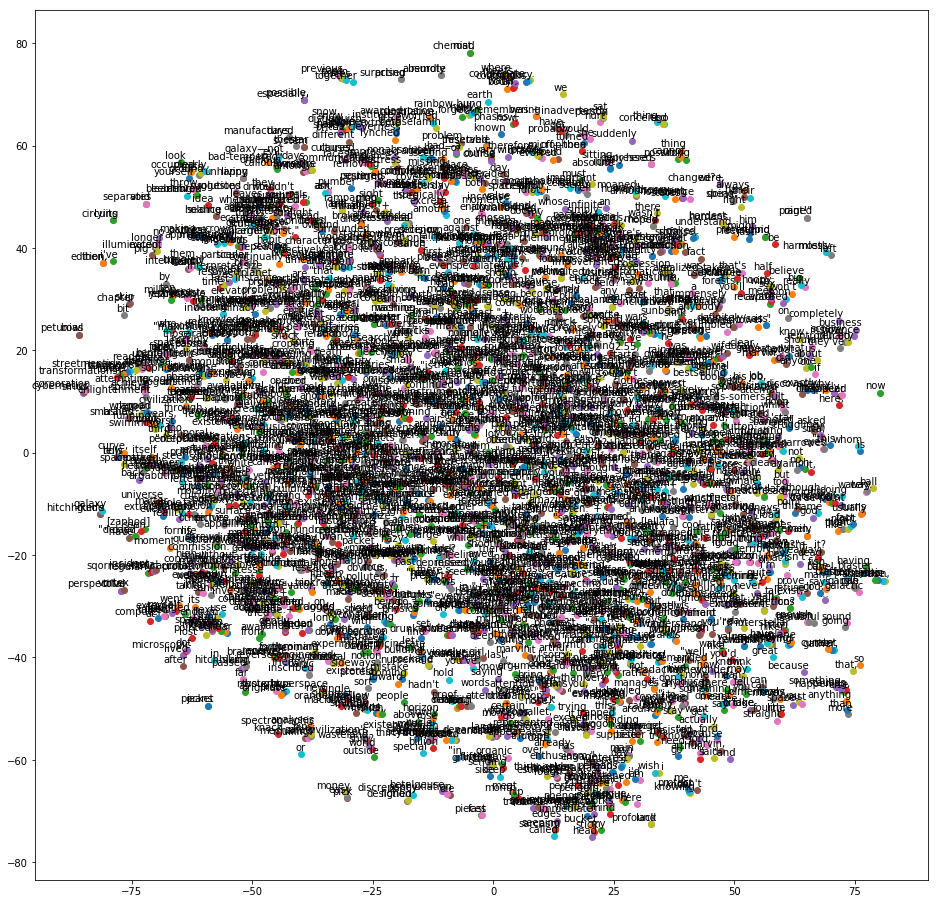

In [14]:
tsne_plot(word_model)